#Image classification using DEEP LEARNING 

Dataset:-

https://drive.google.com/drive/folders/1QGOx4H_bQHCdHmmOu2yt8mbmgqe8tMPq?usp=sharing

### Mounting drive for data loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import models,layers
import tensorflow as tf
import os

# from tensorflow import keras
# from tensorflow.keras import layers
print("D o n e ")

D o n e 


### Making constants

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

### Loading the image file in colab with tf.keras

In [6]:
# here we are loading the data from google drive folder to out notebook using tf.keras method of tensorflow 
data =tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/drive/MyDrive/Msc AI /AI projects/Tomato disease (1)/project',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = (BATCH_SIZE))

# we loaded all image data which contains 1899 images belonging to 5 classes 

Found 1899 files belonging to 5 classes.


In [5]:
# here we are printing class names 
class_names = data.class_names
class_names

['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']

In [8]:
len(data)

60

In [9]:
1899/32 # this is why len(data) is 60 our batch size is 32

59.34375

In [10]:
for image_batch, labels_batch in data.take(1):
    print('batch_size,dimensions,channels:',image_batch.shape)
    print(labels_batch.numpy())

batch_size,dimensions,channels: (32, 256, 256, 3)
[4 3 0 4 4 2 3 0 0 0 4 0 0 0 0 2 0 2 0 4 4 0 2 4 0 2 0 0 4 4 4 3]


In [11]:
for image_batch, labels_batch in data.take(1):
    print(image_batch[0].numpy())
# printing one image batch as numpy array

[[[129.05078   73.76953   61.117188]
  [195.35938  117.62109  129.48438 ]
  [167.49219  110.96875  132.42578 ]
  ...
  [ 39.        14.125     16.5     ]
  [ 39.        14.        17.      ]
  [ 37.        12.        15.      ]]

 [[178.59766  141.10938  144.54688 ]
  [162.07031   92.63672  114.59375 ]
  [150.96484   95.125    136.42188 ]
  ...
  [ 39.        14.125     16.5     ]
  [ 39.        14.        17.      ]
  [ 37.        12.        15.      ]]

 [[233.88281  218.14453  222.39453 ]
  [174.9336   122.21484  134.14844 ]
  [169.28125  117.53125  166.78125 ]
  ...
  [ 38.46875   13.59375   15.96875 ]
  [ 38.21875   13.21875   16.21875 ]
  [ 37.        12.        15.      ]]

 ...

 [[197.44922  208.66797  200.23047 ]
  [201.59375  212.8125   204.375   ]
  [189.66406  200.66406  192.91406 ]
  ...
  [ 87.        49.        48.      ]
  [ 87.        49.        48.      ]
  [ 85.        47.        46.      ]]

 [[200.53125  211.53125  207.53125 ]
  [203.       214.       210.      ]


<Figure size 800x800 with 0 Axes>

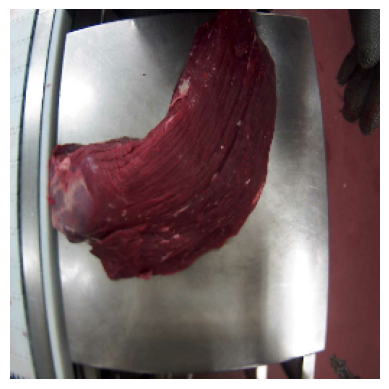

<Figure size 800x800 with 0 Axes>

In [12]:
# sample image from data
plt.imshow(image_batch[3].numpy().astype("uint8"))
plt.axis("off")
plt.figure(figsize=(8,8))

### Visualizing the classes

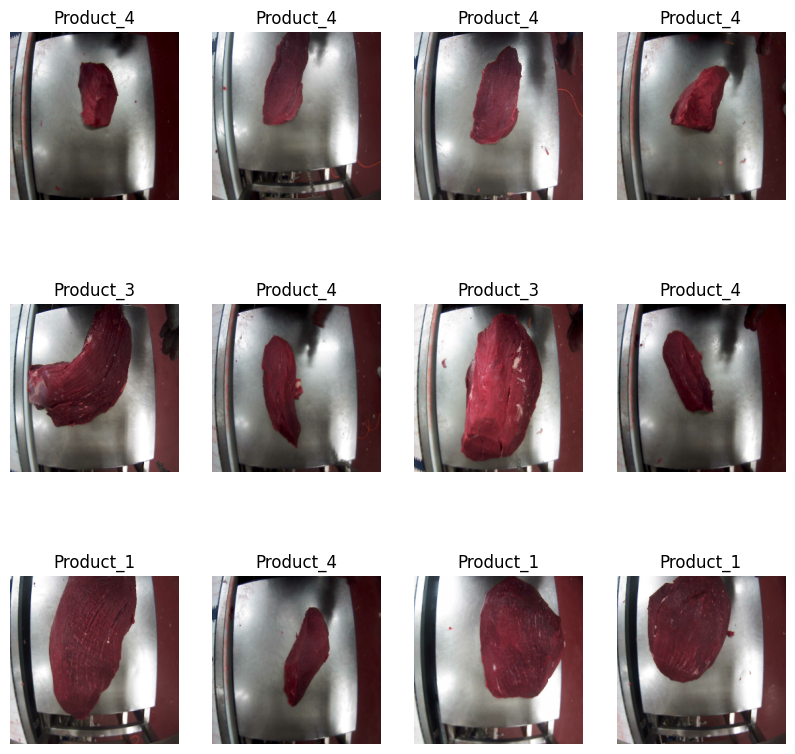

In [13]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in data.take(1):
    for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[labels_batch[i]])
      plt.axis("off")
    

### Train_Test_Split

In [14]:
len(data)

60

In [15]:
train_size = 0.8
len(data)*train_size

48.0

In [16]:
train_ds = data.take(48)
len(train_ds)

48

In [17]:
test_ds = data.skip(48)
len(test_ds)

12

In [18]:
val_size = 0.1
len(data)*val_size

6.0

In [19]:
#val_ds = test_ds.take(7)
#len(val_ds)

In [20]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [21]:
test_ds = test_ds.skip(6)
len(test_ds)

6

### Partitioning the data

In [7]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

  ds_size = len(ds)
  
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  
  return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(data)

In [24]:
len(train_ds)

48

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

6

Cache, Shuffle, and Prefetch the Dataset

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
print('done')

done


## Model Building 

## Model _1 user defined CNN

In [9]:
# data preprocessing 
resize_and_rescale=tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),

])

In [10]:
# here we are performing data augmentation using keras
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),

])

In [11]:
# Defining the model
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 5
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=input_shape)
print('done')

done


In [12]:
model.summary()

# here model is defined with 184202 learnable parameters

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [32]:
# model compiler and adding optimizer (adam)
from tensorflow.python.data.ops.options import OptimizationOptions
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics =['accuracy'])
print('done')

done


In [33]:
# adding early stopping to prevent over fitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [34]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
48/48 [==============================] - 520s 6s/step - loss: 1.4219 - accuracy: 0.3182 - val_loss: 1.3058 - val_accuracy: 0.4427
Epoch 2/20
48/48 [==============================] - 237s 5s/step - loss: 1.0762 - accuracy: 0.5531 - val_loss: 0.7147 - val_accuracy: 0.7083
Epoch 3/20
48/48 [==============================] - 243s 5s/step - loss: 0.6199 - accuracy: 0.7498 - val_loss: 0.5052 - val_accuracy: 0.7917
Epoch 4/20
48/48 [==============================] - 240s 5s/step - loss: 0.4775 - accuracy: 0.8046 - val_loss: 0.4063 - val_accuracy: 0.8333
Epoch 5/20
48/48 [==============================] - 239s 5s/step - loss: 0.3766 - accuracy: 0.8535 - val_loss: 0.3290 - val_accuracy: 0.8646
Epoch 6/20
48/48 [==============================] - 238s 5s/step - loss: 0.2879 - accuracy: 0.8997 - val_loss: 0.2533 - val_accuracy: 0.9062
Epoch 7/20
48/48 [==============================] - 244s 5s/step - loss: 0.2345 - accuracy: 0.9221 - val_loss: 0.4833 - val_accuracy: 0.8281
Epoch 8/20
48

In [35]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 26s 1s/step - loss: 0.2034 - accuracy: 0.9427


In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 48}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
len(history.history['loss'])

20

In [40]:
type(history.history['loss'])

list

In [41]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.4219483137130737,
 1.0762232542037964,
 0.6199316382408142,
 0.47746920585632324,
 0.37661266326904297]

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Plot of training vs val accuracy model_1

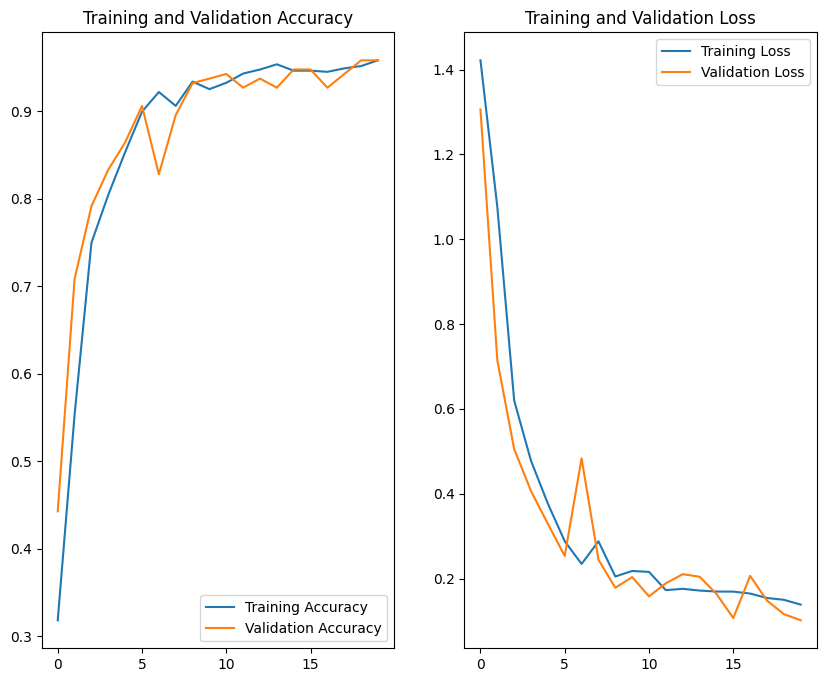

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Product_3
1/1 [==============================] - 1s 1s/step
predicted label: Product_3


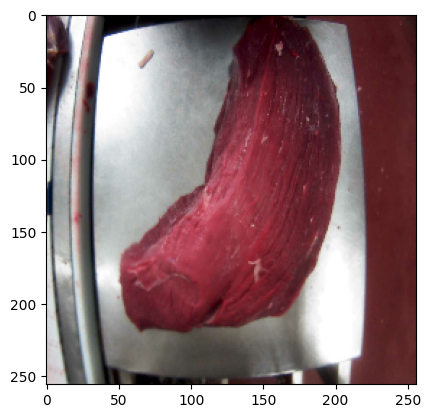

In [44]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

Write a function for inference

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

1/1 [==============================] - 0s 55ms/step


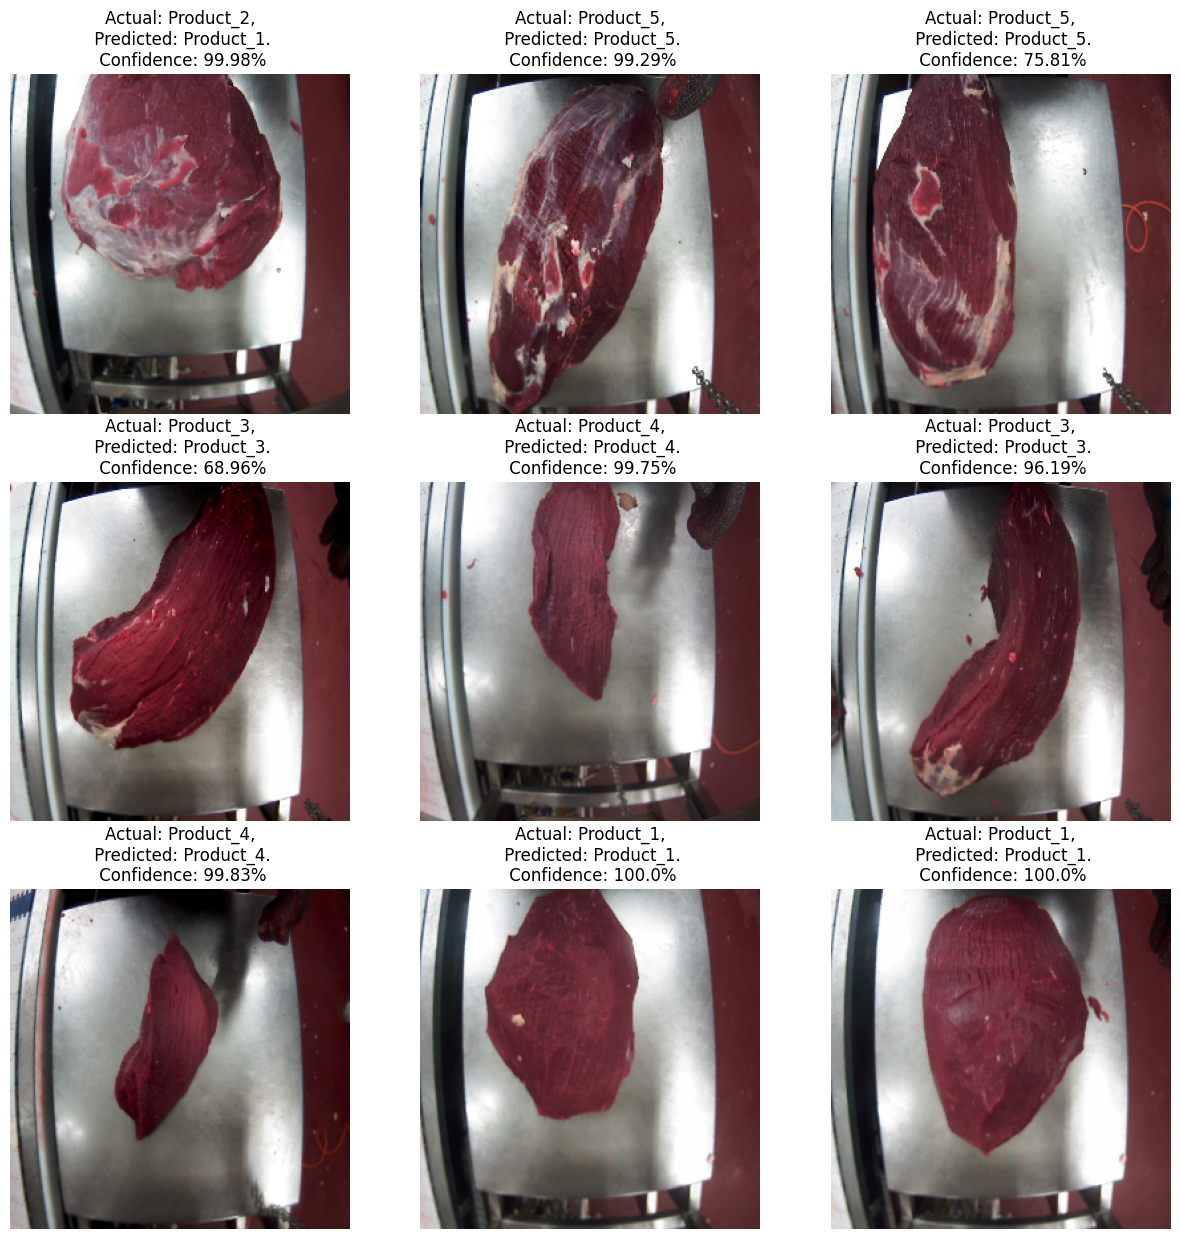

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## Model_2 Transfer learning with pre-trained vgg16

In [10]:
# data preprocessing 
resize_and_rescale_2=tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./223),

])

In [11]:
# here we are performing data augmentation using keras
data_augmentation_2=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),

])

In [12]:
from tensorflow.keras.applications import VGG16


In [13]:
input_shape = (32,224,224,3)
n_classes =5
# Load the pre-trained VGG16 model and its weights
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape[1:])

# Freeze the layers of the pre-trained model
for layer in vgg16.layers:
    layer.trainable = False


In [14]:


# Create a new model that includes the pre-trained VGG16 model as a layer
model2 = models.Sequential([
    resize_and_rescale_2,
    data_augmentation_2,
    vgg16,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model2.build(input_shape=input_shape)
print('done')


done


In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (32, 25088)               0         
                                                                 
 dense (Dense)               (32, 64)                  1605696   
                                                                 
 dense_1 (Dense)             (32, 5)                   325       
                                                                 
Total params: 16,320,709
Trainable params: 1,606,021
N

In [16]:
# model compiler and adding optimizer (adam)
from tensorflow.python.data.ops.options import OptimizationOptions
model2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics =['accuracy'])
print('done')

done


In [18]:
history2 = model2.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=4
) # fitting the model

Epoch 1/4
48/48 [==============================] - 1115s 23s/step - loss: 0.3865 - accuracy: 0.9215 - val_loss: 0.2840 - val_accuracy: 0.9531
Epoch 2/4
48/48 [==============================] - 1090s 23s/step - loss: 0.2565 - accuracy: 0.9446 - val_loss: 0.2033 - val_accuracy: 0.9688
Epoch 3/4
48/48 [==============================] - 1101s 23s/step - loss: 0.1997 - accuracy: 0.9485 - val_loss: 0.1747 - val_accuracy: 0.9688
Epoch 4/4
48/48 [==============================] - 1100s 23s/step - loss: 0.1731 - accuracy: 0.9505 - val_loss: 0.1800 - val_accuracy: 0.9531


In [20]:
scores = model2.evaluate(test_ds)


6/6 [==============================] - 146s 21s/step - loss: 0.1899 - accuracy: 0.9167


In [23]:
history2


In [24]:
history2.params


{'verbose': 1, 'epochs': 4, 'steps': 48}

In [27]:
history2.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

### plot of validatio vs training accuracy of model_2

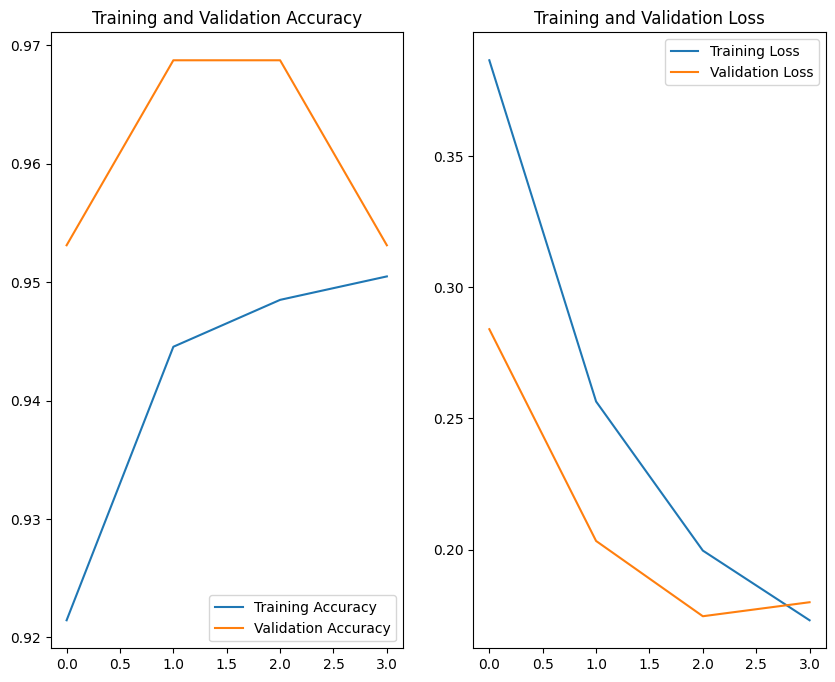

In [32]:

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(range(4), acc, label='Training Accuracy')
plt.plot(range(4), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(4), loss, label='Training Loss')
plt.plot(range(4), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Running prediction on model_2

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model2.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [35]:
class_names = data.class_names


first image to predict
actual label: Product_5
1/1 [==============================] - 21s 21s/step
predicted label: Product_5


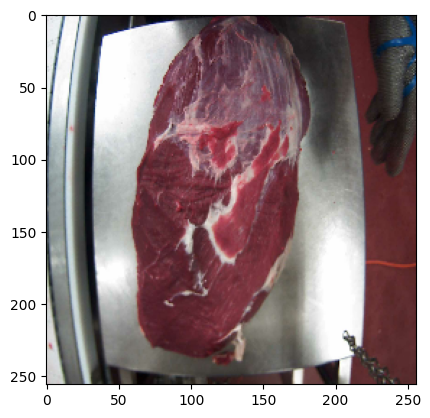

In [37]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model2.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Conclusion 

Accuracy on CNN model : 94%
Accuracy on VGG16 : 91.76 %

Even though we got more accuracy on custom CNN model than VGG16 pretrained model we should note that it took 20 epoch for our custom model to reach more than 90% accuracy whereas it just took 4 epochs for VGG16 based model to reach more than 90% so we can say that if VGG16 is more strong model than our custom model